In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import datetime
from PIL import Image
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
                                    Add, AveragePooling2D, Flatten, Dense, Dropout
import tensorflow.keras.layers as layers
from keras.models import Sequential
import tensorflow.keras.optimizers


#Loading and Visulizing

## Loading

In [12]:
#Loading Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Visualizing

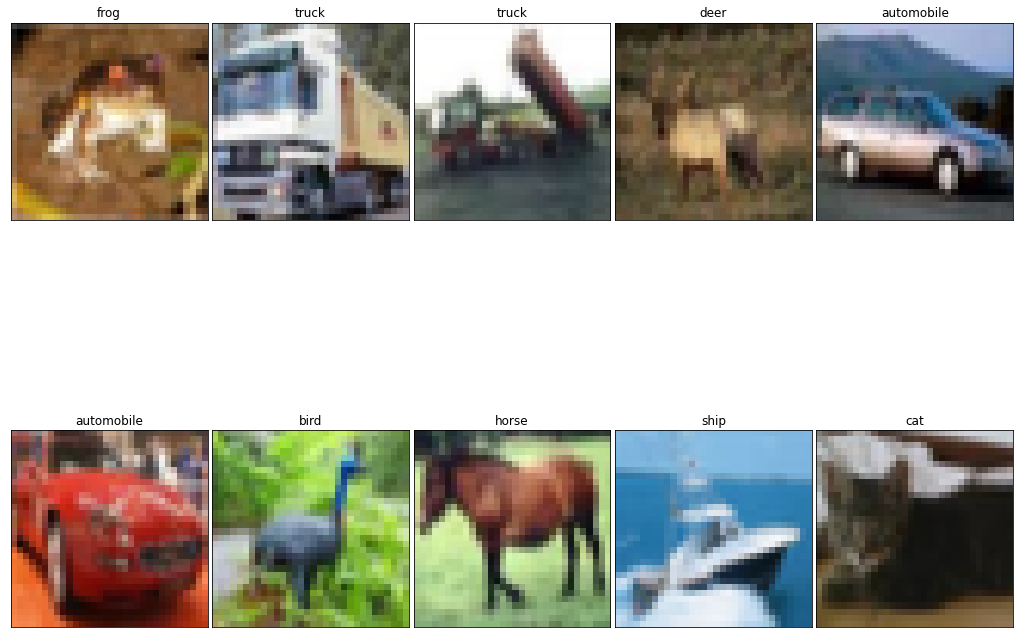

In [13]:
#showing the Data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig , ax = plt.subplots(nrows=2, ncols= 5, figsize = (14, 14), sharex=True, sharey=True)
ax = ax.flatten()

for i, a in enumerate(ax):   
    a.imshow(X_train[i])
    a.set(title = class_names[int(y_train[i])])
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout(0.1)
plt.grid(False)

## PreProccesing

In [17]:
#Convering Type
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

# Standardizing
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class
num_classes = 10
train_labels = np_utils.to_categorical(y_train, num_classes)
test_labels = np_utils.to_categorical(y_test, num_classes)

# Part 1

## Creating model

In [24]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               393344    
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                     

## Training model

### first try (batch_normalization and dropout included!)

In [19]:
#scheduling the learning rate
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=lr_schedule)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=150,
                    validation_data=(test_images, test_labels))

Epoch 1/150
782/782 [==============================] - 6s 7ms/step - loss: 2.9411 - acc: 0.1675 - val_loss: 2.0064 - val_acc: 0.3011
Epoch 2/150
782/782 [==============================] - 5s 6ms/step - loss: 2.5724 - acc: 0.2114 - val_loss: 1.8888 - val_acc: 0.3360
Epoch 3/150
782/782 [==============================] - 5s 6ms/step - loss: 2.3980 - acc: 0.2338 - val_loss: 1.8433 - val_acc: 0.3544
Epoch 4/150
782/782 [==============================] - 5s 6ms/step - loss: 2.2782 - acc: 0.2483 - val_loss: 1.8035 - val_acc: 0.3675
Epoch 5/150
782/782 [==============================] - 5s 6ms/step - loss: 2.2014 - acc: 0.2586 - val_loss: 1.7676 - val_acc: 0.3786
Epoch 6/150
782/782 [==============================] - 5s 6ms/step - loss: 2.1419 - acc: 0.2706 - val_loss: 1.7676 - val_acc: 0.3804
Epoch 7/150
782/782 [==============================] - 5s 6ms/step - loss: 2.0947 - acc: 0.2790 - val_loss: 1.7540 - val_acc: 0.3821
Epoch 8/150
782/782 [==============================] - 5s 6ms/step - 

### Second try (batch_normalization and dropout included!)

In [22]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=128, epochs=80,
                    validation_data=(test_images, test_labels))

Epoch 1/80
391/391 [==============================] - 4s 7ms/step - loss: 2.9817 - acc: 0.1519 - val_loss: 2.0890 - val_acc: 0.2447
Epoch 2/80
391/391 [==============================] - 2s 6ms/step - loss: 2.6645 - acc: 0.1906 - val_loss: 1.9626 - val_acc: 0.2982
Epoch 3/80
391/391 [==============================] - 2s 6ms/step - loss: 2.5185 - acc: 0.2181 - val_loss: 1.9042 - val_acc: 0.3244
Epoch 4/80
391/391 [==============================] - 2s 6ms/step - loss: 2.4226 - acc: 0.2297 - val_loss: 1.8961 - val_acc: 0.3227
Epoch 5/80
391/391 [==============================] - 2s 6ms/step - loss: 2.3366 - acc: 0.2419 - val_loss: 1.8313 - val_acc: 0.3494
Epoch 6/80
391/391 [==============================] - 2s 6ms/step - loss: 2.2789 - acc: 0.2473 - val_loss: 1.8085 - val_acc: 0.3526
Epoch 7/80
391/391 [==============================] - 2s 6ms/step - loss: 2.2241 - acc: 0.2567 - val_loss: 1.7936 - val_acc: 0.3643
Epoch 8/80
391/391 [==============================] - 2s 6ms/step - loss: 2.

## الف

In [31]:
from datetime import datetime


model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               393344    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


### batch_size = 32

In [28]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=32, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1238 - acc: 0.2325 - val_loss: 2.0078 - val_acc: 0.2881
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9495 - acc: 0.3103 - val_loss: 1.9126 - val_acc: 0.3242
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8812 - acc: 0.3397 - val_loss: 1.8644 - val_acc: 0.3438
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8394 - acc: 0.3555 - val_loss: 1.8230 - val_acc: 0.3640
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8080 - acc: 0.3670 - val_loss: 1.8010 - val_acc: 0.3714
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7806 - acc: 0.3781 - val_loss: 1.7734 - val_acc: 0.3758
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7565 - acc: 0.3875 - val_loss: 1.7491 - val_acc: 0.3898
Epoch 8/50
1563/1563 [==============================] - 7s 4ms

### batch_size = 64

In [30]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=64, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 2.1909 - acc: 0.1981 - val_loss: 2.1027 - val_acc: 0.2381
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 2.0534 - acc: 0.2594 - val_loss: 2.0138 - val_acc: 0.2672
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9827 - acc: 0.2918 - val_loss: 1.9578 - val_acc: 0.3016
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9340 - acc: 0.3179 - val_loss: 1.9165 - val_acc: 0.3144
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8976 - acc: 0.3314 - val_loss: 1.8866 - val_acc: 0.3330
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8689 - acc: 0.3447 - val_loss: 1.8611 - val_acc: 0.3468
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8446 - acc: 0.3533 - val_loss: 1.8368 - val_acc: 0.3532
Epoch 8/50
782/782 [==============================] - 3s 4ms/step - loss: 1.

### batch_size = 256

In [32]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=256, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2545 - acc: 0.1469 - val_loss: 2.1992 - val_acc: 0.1845
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1635 - acc: 0.2097 - val_loss: 2.1268 - val_acc: 0.2310
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1035 - acc: 0.2437 - val_loss: 2.0790 - val_acc: 0.2532
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0616 - acc: 0.2644 - val_loss: 2.0426 - val_acc: 0.2730
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0291 - acc: 0.2796 - val_loss: 2.0145 - val_acc: 0.2875
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 2.0027 - acc: 0.2916 - val_loss: 1.9904 - val_acc: 0.2932
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9810 - acc: 0.3007 - val_loss: 1.9706 - val_acc: 0.3033
Epoch 8/50
196/196 [==============================] - 1s 6ms/step - loss: 1.

### Conclusion 

We can see that increasing batch_size can generally result in decreasing run time and accurcy of model at the same time which was expected 

## ب